In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Exploring the Data

**Questions We are looking to answer:**
1. Who will be eligible for retirement in the next 5 few years 
    * Those who are 65+ years old 
    * Which department do they work in
2. How many positions will need to be filled
    * Organize by department
    * Order of magnitude by department

## Who is Eligible for Retirement?

Below is a function to create a pie chart that compares the number of employees 
eligible for retirment to the entire employee total. With <mark>300,024</mark> employees total
<mark>41,380</mark> of them will be over the age of 65 in the next 5 years.

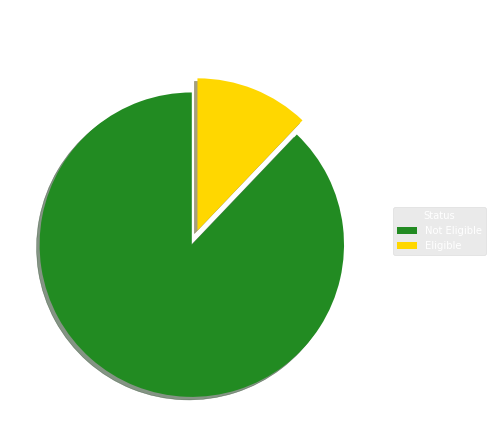

There are 240124 employees total.
33118 will be over the age of 65 in the next 5 years.


In [16]:
# bring in the csv files with the panda read into df and taking the length of each file
total = len(pd.read_csv('data/current_emp.csv'))
compare = len(pd.read_csv('data/retirement_eligibility.csv'))

# this function takes in two arguments (employee total value and the retirement total value)
# it then calc the percentage relationship between the two values and charts them into a pie chart
# using matplotlib.
def pie_chart(total, compare, title="Title", c1='forestgreen', c2='gold'):
    et_percent = round(((total - compare) / total) * 100)
    rt_percent = round((compare / total) * 100)

    status = [f'{et_percent}%', f'{rt_percent}%']
    status_lgd = ['Not Eligible', 'Eligible']
    data = [total, compare]
    # plot settings
    colors = (c1, c2)
    explode = (0.1, 0.0)
    # sizing the chart
    fig = plt.figure(figsize =(10, 7))
    # creating the plot
    pie = plt.pie(data, 
                  explode = explode, 
                  labels = status,
                  shadow = True,
                  colors = colors,
                  startangle = 90,
                  textprops = dict(color ="white"))
    # plot title and legend
    plt.title(title, c='white')
    l = plt.legend(status_lgd,
                title ="Status",
                loc ="center left",
                bbox_to_anchor =(1, 0, 0.5, 1))
    plt.setp(l.get_title(), color='white')
    plt.setp(l.get_texts(), color='white')
    plt.savefig('analysis/pie_chart_01.png', dpi=200, transparent=True, bbox_inches='tight')
    plt.show(pie)
    
# We are calling upon our function to create a pie chart
pie_chart(total, compare, title="Employees Eligible For Retirement \n(In the Next 5 Years)", c1='forestgreen', c2='gold')
print(f'There are {total} employees total.')
print(f'{compare} will be over the age of 65 in the next 5 years.')

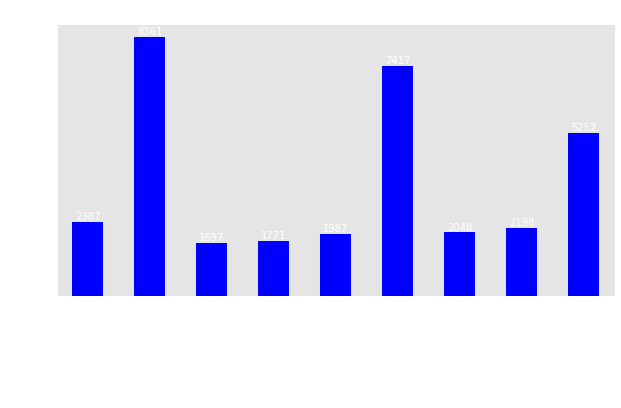

In [3]:
data = pd.read_csv('data/retirement_eligibility.csv')

def bar_chart(df):
    # We want to create a bar chart with groupby.title as the x and sum(groupby.title) as the y
    df = df.groupby(['dept_name']).count()
    df = df.drop(['first_name', 'last_name'], axis=1)
    # groupby is not a dataframe so you need to convert it back to one
    df = df.reset_index()
    df = df.rename(columns={'emp_no': 'total'})
    # Creating the Bar graph
    df.plot(kind='bar', 
            x='dept_name', 
            y='total', 
            figsize=(10,5),
            legend=None,
            grid=False,
            colormap='winter')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.title('Number of Employees Eligible by Department', c='white')
    plt.xlabel('Departments', c='white')
    plt.ylabel('Number of Employees', c='white')
    # Set the labels
    ax = plt.gca()
    ax.set_xticklabels(df['dept_name'])
    # rotate axis labels
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right', wrap=True)
    # Add the total label value to each bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=10, color='white', ha='center', va='bottom')
    plt.savefig('analysis/bar_chart.png', dpi=200, transparent=True, bbox_inches='tight')
    plt.show()
    
bar_chart(data)

In [15]:
for dept in dept_list:
    # We need to create a new dataframe for each department
    dept_df = eligible_df[eligible_df['dept_name'] == dept]
    dept_total = total_df[total_df['dept_name'] == dept]
    # We need to get the length of each dataframe
    dept_total = len(dept_total)
    dept_df = len(dept_df)
    perc = round((dept_df / dept_total) * 100)
    print(f'There are {dept_total} employees in {dept}. {perc} will be over the age of 65 in the next 5 years.')

There are 61386 employees in Development. 14 will be over the age of 65 in the next 5 years.
There are 53304 employees in Production. 14 will be over the age of 65 in the next 5 years.
There are 14546 employees in Quality Management. 14 will be over the age of 65 in the next 5 years.
There are 37701 employees in Sales. 14 will be over the age of 65 in the next 5 years.
There are 14842 employees in Marketing. 13 will be over the age of 65 in the next 5 years.
There are 15441 employees in Research. 14 will be over the age of 65 in the next 5 years.
There are 17569 employees in Customer Service. 14 will be over the age of 65 in the next 5 years.
There are 12898 employees in Human Resources. 14 will be over the age of 65 in the next 5 years.
There are 12437 employees in Finance. 14 will be over the age of 65 in the next 5 years.


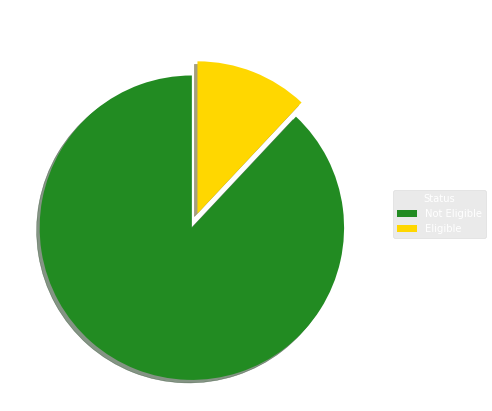

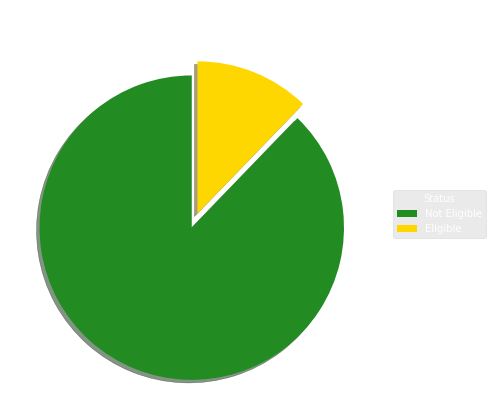

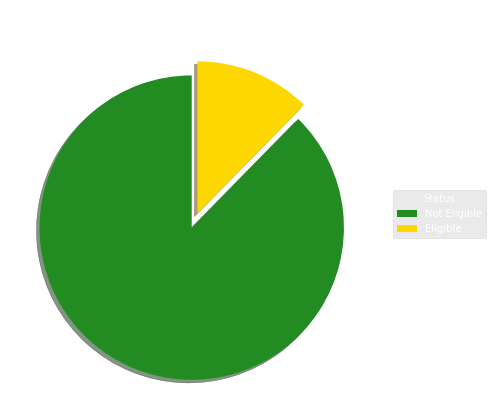

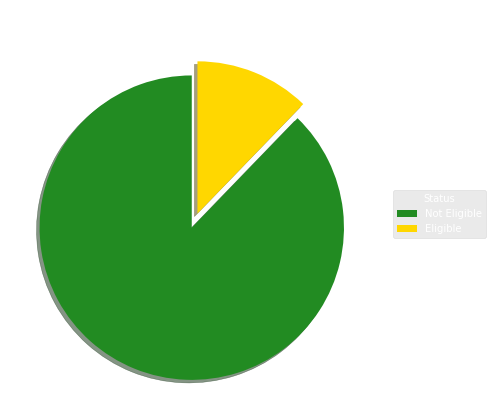

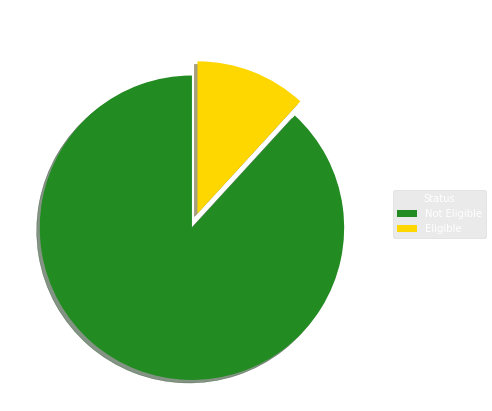

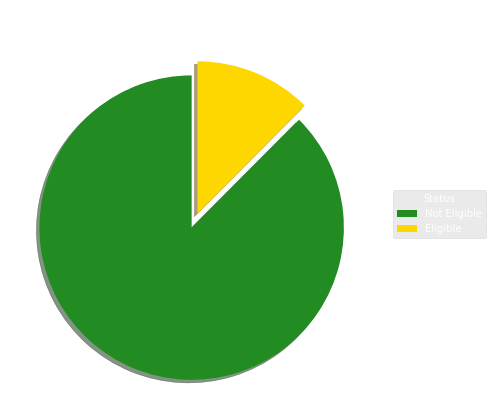

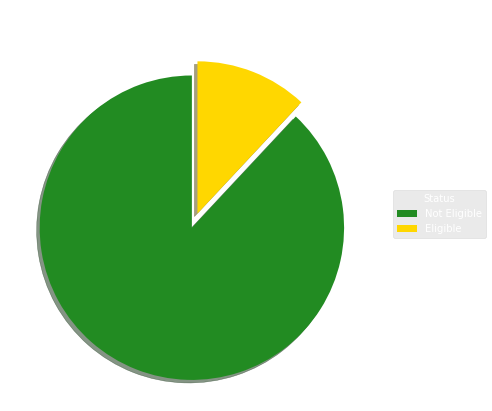

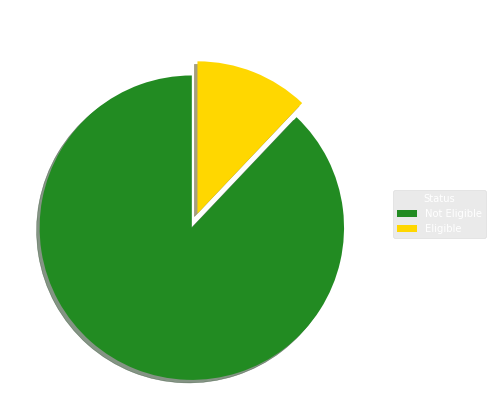

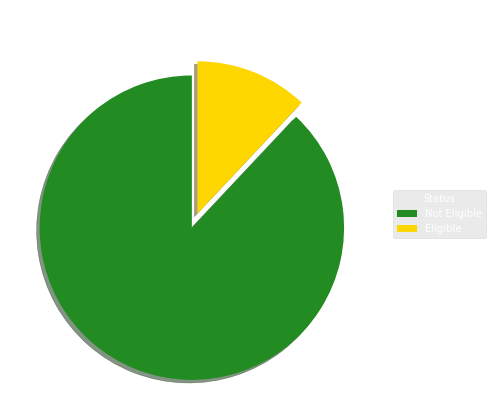

In [13]:
# We want to create pie charts that represent the number of employees 
# eligible for retirement by department making a total of 9 pie charts
# We will use the same function we created above but we will need to
# create a new dataframe for each department and pass it into the
# function as an argument
eligible_df = pd.read_csv('data/retirement_eligibility.csv')
total_df = pd.read_csv('data/current_emp.csv')
# We will create a list of all the departments (This will be used to title the charts)
dept_list = eligible_df['dept_name'].unique()
# We want to create a pie chart for each department
for dept in dept_list:
    # We need to create a new dataframe for each department
    dept_df = eligible_df[eligible_df['dept_name'] == dept]
    dept_total = total_df[total_df['dept_name'] == dept]
    # We need to get the length of each dataframe
    dept_total = len(dept_total)
    dept_df = len(dept_df)
    # We need to pass the length of each dataframe into the function
    pie_chart(dept_total, dept_df, title=dept, c1='forestgreen', c2='gold')
    

